In [40]:
# Загружаем Билиотеки
import csv
import os
import pickle
import codecs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Подключаем Диск
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Файл с локациями 29 отправных точек
testLoc = '/content/drive/My Drive/datasets/tsp-data/bayg29-loc.pickle'
fn = open(testLoc, 'rb')
fn_loc = pickle.load(fn)
for i in fn_loc:
    print(i)

[1150. 1760.]
[ 630. 1660.]
[  40. 2090.]
[ 750. 1100.]
[ 750. 2030.]
[1030. 2070.]
[1650.  650.]
[1490. 1630.]
[ 790. 2260.]
[ 710. 1310.]
[840. 550.]
[1170. 2300.]
[ 970. 1340.]
[510. 700.]
[750. 900.]
[1280. 1200.]
[230. 590.]
[460. 860.]
[1040.  950.]
[ 590. 1390.]
[ 830. 1770.]
[490. 500.]
[1840. 1240.]
[1260. 1500.]
[1280.  790.]
[ 490. 2130.]
[1460. 1420.]
[1260. 1910.]
[ 360. 1980.]


In [43]:
# Матрица с раcчетами растояния между локациями
testDist ='/content/drive/My Drive/datasets/tsp-data/bayg29-dist.pickle'
fd = open(testDist, 'rb')
fd_dist = pickle.load(fd)
for i in fd_dist:
    print(i)

[0, 529.5281, 1158.0155, 771.7513, 482.59714, 332.4154, 1217.4153, 364.0055, 616.1169, 629.36475, 1249.0797, 540.37024, 456.94638, 1238.2245, 948.4725, 574.8913, 1488.3884, 1134.0635, 817.435, 671.193, 320.15622, 1422.3923, 864.0023, 282.3119, 978.67255, 756.63727, 460.10867, 186.01076, 820.061]
[529.5281, 0, 730.0685, 572.7128, 388.973, 572.8001, 1435.4442, 860.5231, 620.967, 359.02646, 1129.6902, 837.37683, 466.9047, 967.47095, 769.41534, 796.30396, 1142.3221, 817.8631, 819.87805, 272.94687, 228.25424, 1168.4177, 1280.8201, 650.0, 1086.0018, 490.408, 864.0023, 677.7905, 418.68842]
[1158.0155, 730.0685, 0, 1218.2775, 712.5307, 990.202, 2160.0232, 1521.2167, 769.0253, 1028.251, 1735.3962, 1149.3477, 1194.7385, 1467.3104, 1385.7128, 1526.3354, 1511.9855, 1299.7307, 1516.4432, 890.2247, 852.3497, 1652.4528, 1990.6029, 1355.1753, 1796.5522, 451.7743, 1570.1274, 1233.2072, 338.37848]
[771.7513, 572.7128, 1218.2775, 0, 930.0, 1009.6039, 1006.2306, 910.2197, 1160.6895, 213.77559, 557.315, 12

In [44]:
# Парсинг данных из файлов
# Создание класса тестового маршрута
class TestRoute:

  def __init__(self, name):
    # переменные
    self.name = name
    self.locations = []
    self.distances = []
    self.tspSize = 0
    self.__initData ()

  # Длина маршрута
  def __len__(self):
    return self.tspSize

  # Чтение данных из файлов
  def __initData(self):
    try:
      self.locations = pickle.load(open(testLoc, 'rb'))
      self.distances = pickle.load(open(testDist, 'rb'))
    except (OSError, IOError):
      pass

    self.tspSize = len(self.locations)

  # Расчет Общей дистанции 
  def getTotalDistance(self, indices):
    distance = self.distances[indices[-1]][indices[0]]
    for i in range(len(indices) - 1):
      distance += self.distances[indices[i]][indices[i + 1]]

    return distance
  # Визуализация данных
  def plotData(self, indices):
    plt.scatter(*zip(*self.locations), marker='*', color='red')
    locs = [self.locations[i] for i in indices]
    locs.append(locs[0])
    plt.plot(*zip(*locs), linestyle='-', color='black')

    return plt


Название: Тестовый маршрут
Oптимальное решение: [0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23]
Длина маршрута: 9074.1474609375


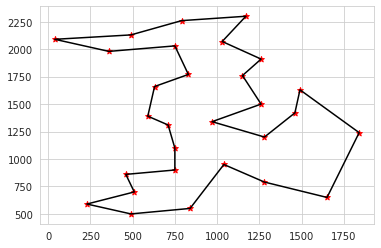

In [45]:
# Функция вывода тестового маршрута
def main():
    tsp = TestRoute("Тестовый маршрут")
    optimalSolution = [0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23]
    print(f"Название: {tsp.name}")
    print(f"Oптимальное решение: {optimalSolution}")
    print(f"Длина маршрута: {tsp.getTotalDistance(optimalSolution)}")
    # Визуализация маршрута
    plot = tsp.plotData(optimalSolution)
    plot.show()
main()

In [46]:
# Устанавливаем модуль для работы с генетическими алгоритмами
!pip install deap

In [47]:
!pip install tsp

Применение гинетического алгоритма

In [48]:
# Импортируем модуль
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import array
import tsp

In [49]:
# Фиксированное начальное значение генератора случайных чисел
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# Переменные
TSP_NAME = "Тестовый маршрут"  
tsp = TestRoute(TSP_NAME)

# Константы генетического алгоритма
POPULATION_SIZE = 300 # количество индивидуумов в популяции
MAX_GENERATIONS = 200 # максимальное количество поколений
HALL_OF_FAME_SIZE = 1 # константы задачи
P_CROSSOVER = 0.9 # вероятность скрещивания
P_MUTATION = 0.1 # вероятность мутации индивидуума
toolbox = base.Toolbox() # класс Toolbox, который позволяет регистрировать новые функции
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # класс Fitness,задача – минимизировать, то выбираем стратегию FitnessMin
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin) # для представления индивидуумов используется класс с  именем Individual
toolbox.register("randomOrder", random.sample, range(len(tsp)), len(tsp)) # оператор randomOrder В результате генерируется случайный список индексов от 0 до n – 1
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder) # оператор IndividualCreator. Он вызывает оператор randomOrder и обходит созданный им список с целью создать хромосому
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator) # оператор populationCreator, который порождает список индивидуумов, вызывая в цикле оператор IndividualCreator
# Реализовав хромосому, мы можем определить функцию вычисления приспособленности. 
# tspDistance(), которая вызывает метод getTotalDistance()
def tpsDistance(individual):
    return tsp.getTotalDistance(individual), 
toolbox.register("evaluate", tpsDistance)
# определение генетических операторов.
# будеми спользовать турнирный отбор с турниром размера 3
toolbox.register("select", tools.selTournament, tournsize=3) 
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp))
toolbox.register("evaluate", tpsDistance)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	min    	avg  
0  	300   	21103.3	26457
1  	279   	19562.4	25128.9
2  	275   	19456.5	24267.3
3  	279   	19760.9	23592  
4  	278   	19406.4	22963.5
5  	276   	19105.2	22480.7
6  	281   	17802.4	22129.9
7  	279   	18160.2	21581.5
8  	274   	17691.3	21253.6
9  	277   	16011.9	20877.8
10 	268   	16011.9	20597.9
11 	279   	15878.8	20413.2
12 	269   	14589.1	20188.2
13 	272   	14589.1	19987.8
14 	281   	15182.9	19910.4
15 	276   	15836.2	19437  
16 	276   	15687.4	19117.2
17 	282   	15426.5	19039.4
18 	282   	14905.2	18696.7
19 	269   	15020.4	18614.9
20 	275   	13346.3	18424  
21 	276   	14711.4	18330.1
22 	275   	13139.1	18312  
23 	274   	13139.1	18005  
24 	278   	13002.5	17725.6
25 	262   	12203.5	17543.2
26 	274   	13157.3	17285.2
27 	260   	12918.6	16946.3
28 	271   	12918.6	16646  
29 	262   	12918.6	16441  
30 	279   	12652.9	16194.2
31 	265   	12652.9	15910.6
32 	278   	12565.6	15942.4
33 	278   	12520.5	15682  
34 	283   	12436.1	15569.5
35 	272   	12214  	15441.9
36 	2

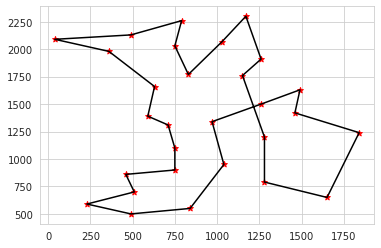

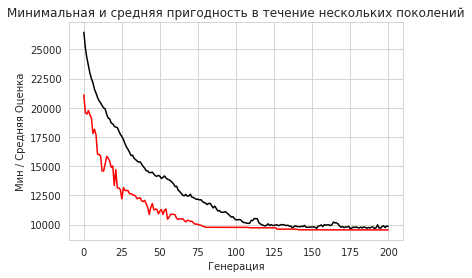

In [50]:
# пользуемся встроенным в DEAP алгоритмом eaSimple и его объектами статистики и залом славы

def main():
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)
    best = hof.items[0]
    print(f"Лучший Вид Индивид: {best}")
    print(f"Лучший Фитнес: {best.fitness.values[0]}")

    plt.figure(1)
    tsp.plotData(best)

    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    plt.figure(2)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='black')
    plt.xlabel('Генерация')
    plt.ylabel('Мин / Средняя Оценка')
    plt.title('Минимальная и средняя пригодность в течение нескольких поколений')
    
    plt.show()

main()

Дополнительное исследование

In [51]:
# модифицировать код алгоритма DEAP eaSimple(), поскольку каркас не дает прямого способа обойти эти операторы.

from deap import tools
from deap import algorithms

def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """Этот алгоритм аналогичен алгоритму DEAP eaSimple (), с той модификацией, что
    halloffame используется для реализации механизма элитарности. Особи, содержащиеся в halloffame, 
    непосредственно вводятся в следующее поколение и не подвергаются
    генетическим операторам отбора, скрещивания и мутации."""
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")
    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0
    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    for gen in range(1, ngen + 1):
        offspring = toolbox.select(population, len(population) - hof_size)
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        offspring.extend(halloffame.items)
        halloffame.update(offspring)
        population[:] = offspring
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)
    return population, logbook


/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	min    	avg  
0  	300   	21103.3	26457
1  	252   	19726.4	25210.9
2  	249   	18977.1	24364.3
3  	257   	17868.2	23514.7
4  	237   	17585.3	22929.8
5  	247   	17585.3	22350.6
6  	247   	17585.3	21831.4
7  	249   	17012.3	21442.6
8  	238   	17012.3	20999.7
9  	249   	16856.3	20513.2
10 	249   	16766.4	20235.4
11 	249   	16165.7	19852.8
12 	244   	14934  	19588.4
13 	242   	14934  	19454.3
14 	252   	14934  	19412.6
15 	245   	14757.5	19286.6
16 	242   	14757.5	19057.2
17 	253   	14757.5	18846.9
18 	246   	14757.5	18782.7
19 	240   	14607  	18293.7
20 	249   	14607  	17740.2
21 	248   	14227.7	17786.1
22 	238   	14227.7	17546.7
23 	242   	12893.9	17310.7
24 	245   	12893.9	16959.3
25 	241   	12893.9	16699.8
26 	242   	12766.2	16481.4
27 	246   	12766.2	16321.5
28 	246   	12662.4	16263.8
29 	236   	12662.4	15799.7
30 	248   	12610.1	15691.9
31 	245   	12610.1	15636.5
32 	247   	12410.6	15465  
33 	253   	12199.6	15328.7
34 	242   	12199.6	15059.9
35 	237   	11848.8	15000.8
36 	2

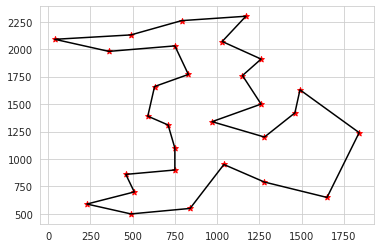

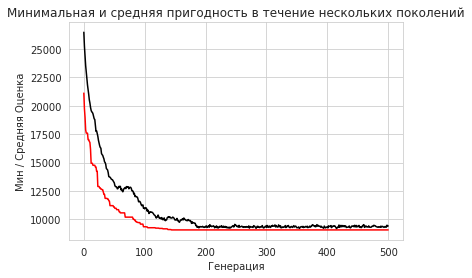

In [39]:
# Фиксированное начальное значение генератора случайных чисел
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

TSP_NAME = "Тестовый маршрут с 500 поколениями"  
tsp = TestRoute(TSP_NAME)
# Константы генетического алгоритма
POPULATION_SIZE = 300 # количество индивидуумов в популяции
MAX_GENERATIONS = 500 # максимальное количество поколений
HALL_OF_FAME_SIZE = 30 # константы задачи
P_CROSSOVER = 0.9  # вероятность скрещивания
P_MUTATION = 0.1   # вероятность мутации индивидуума

toolbox = base.Toolbox() # класс Toolbox, который позволяет регистрировать новые функции
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # класс Fitness,задача – минимизировать, то выбираем стратегию FitnessMin
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin) # для представления индивидуумов используется класс с  именем Individual
toolbox.register("randomOrder", random.sample, range(len(tsp)), len(tsp)) # оператор randomOrder В результате генерируется случайный список индексов от 0 до n – 1
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder) # оператор IndividualCreator. Он вызывает оператор randomOrder и обходит созданный им список с целью создать хромосому
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)  # оператор populationCreator, который порождает список индивидуумов, вызывая в цикле оператор IndividualCreator
# Реализовав хромосому, мы можем определить функцию вычисления приспособленности. 
# tspDistance(), которая вызывает метод getTotalDistance()
def tpsDistance(individual):
    return tsp.getTotalDistance(individual),
# определение генетических операторов.
# будеми спользовать турнирный отбор с турниром размера 2
toolbox.register("evaluate", tpsDistance)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp))


def main():
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
    population, logbook = eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)
    best = hof.items[0]
    print(f"Лучший Вид Индивид: {best}")
    print(f"Лучший Фитнес: {best.fitness.values[0]}")

    plt.figure(1)
    tsp.plotData(best)
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    plt.figure(2)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='black')
    plt.xlabel('Генерация')
    plt.ylabel('Мин / Средняя Оценка')
    plt.title('Минимальная и средняя пригодность в течение нескольких поколений')
    plt.show()

main()
